Solultions per second, or more commonly called the hash-rate refers to the speed at which a device is solving complex equations on the selected algorithm. Since the speed at which these equations can be solved may influence the amount of reward earned, lets take a look at the Solultion per Second (Sol/s) as a function of Time (Minutes) as well as the mean for each GPU, and all GPU's.

In [54]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#Prompt user for file input, catch with a default if statement
fname = input('Enter file name: ')
if (len(fname) < 1): fname = 'ewbf.log'
    
    
# Open file and use a for loop to split each line and isolate lines that start with desired text
# using the startswith function and continue statement

# Create an empty dictionary and fill with indices 0-12 for each gpu, values are sliced from each returned line from the for loop
# Create empty list to contain appended keys and values from the dictionary
fh = open(fname)
gpu = dict()
lst = list()

for lines in fh:
    
    x = lines.split(' ')
    if not lines.startswith('GPU0: '): continue
        
    gpu[0] = x[0:2]
    gpu[1] = x[3:5]
    gpu[2] = x[6:8]
    gpu[3] = x[9:11]
    gpu[4] = x[12:14]
    gpu[5] = x[15:17]
    gpu[6] = x[18:20]
    gpu[7] = x[21:23]
    gpu[8] = x[24:26]
    gpu[9] = x[27:29]
    gpu[10] = x[30:32]
    gpu[11] = x[33:35]
    gpu[12] = x[36:38]
        
    #print(gpu)
    
#For each key in the dictionary, add the key-value pair (tuple) to the list
    for key in gpu:
        value = gpu[key]
        lst.append(value)
        
#print(lst)

# A dataframe from the using the keys and values appended to the list is creating using pandas

df = pd.DataFrame(lst)
df.columns = ['GPU Number', 'Sol/s']
df.tail()

Enter file name: 


,GPU Number,Sol/s
3596,GPU8:,512
3597,GPU9:,491
3598,GPU10:,479
3599,GPU11:,486
3600,GPU12:,485


In [55]:
# Isolate the data for each gpu by using the builtin .loc indexing function 
# to locate GPU0: from the dataframe
# create a new dataframe

df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.head()

,GPU Number,Sol/s
0,GPU0:,488
13,GPU0:,478
26,GPU0:,479
39,GPU0:,473
52,GPU0:,464


In [56]:
# The index is reset so that a function for minutes can be set based on the index values

df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
df_gpu0_sols.head()

,GPU Number,Sol/s
0,GPU0:,488
1,GPU0:,478
2,GPU0:,479
3,GPU0:,473
4,GPU0:,464


In [57]:
# Data has been reported every 30 seconds, from the original index values from df a for loop is used to iterate 
# over each value and set time variables that are appended to a list.
# create dataframe from list using pandas

rows = df_gpu0_sols.index.values
lst = list()

for time in rows:
    secs = (30 + (time * 30))  
    minutes = secs / 60
    hrs = minutes / 60
    #print(minutes)
    lst.append(minutes)
#print(lst)
    
columns = ['Minutes']    
df_minutes = pd.DataFrame(lst, columns = columns)
df_minutes.head()

,Minutes
0,0.5
1,1.0
2,1.5
3,2.0
4,2.5


In [58]:
# Create new dataframe for gpu0 by concatenating dataframes using pandas built in .concat function
# Drop NaN values from dataframe

df_gpu0_sols = pd.concat([df_minutes, df_gpu0_sols], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()
df_gpu0_sols.head()

,Minutes,GPU Number,Sol/s
0,0.5,GPU0:,488
1,1.0,GPU0:,478
2,1.5,GPU0:,479
3,2.0,GPU0:,473
4,2.5,GPU0:,464


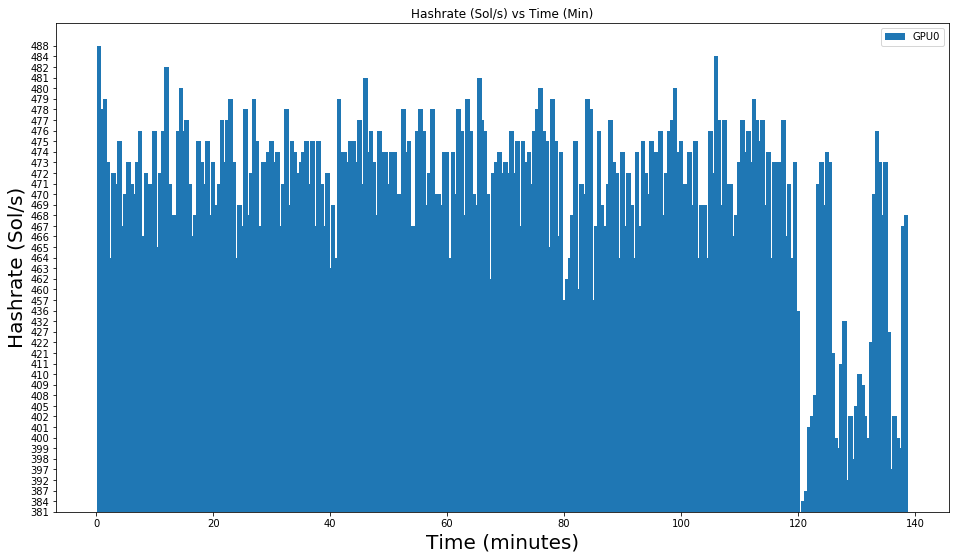

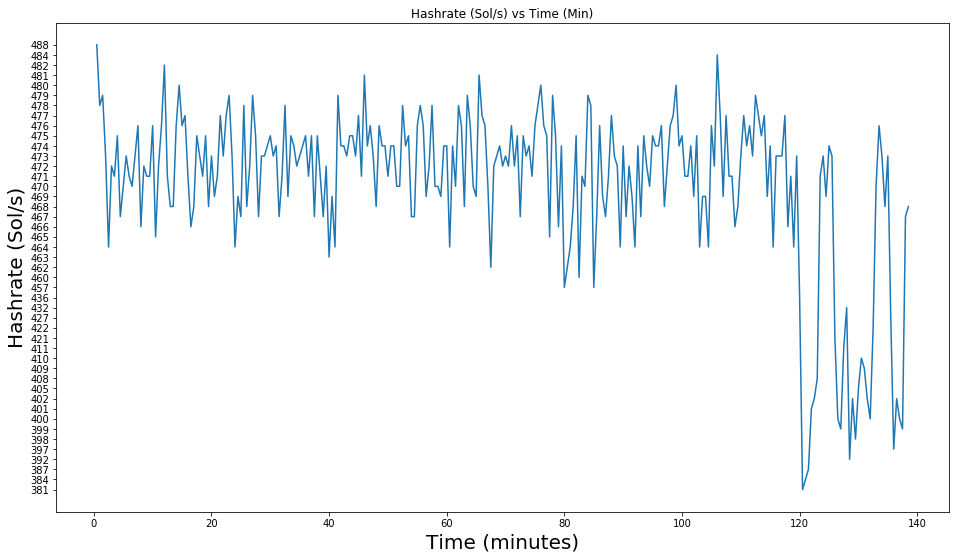

In [59]:
# Matplotlib is used to plot data from selected dataframe columns

plt.bar(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], align='center', alpha=1.0, label='GPU0')
plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.legend()
plt.show()

#ax = plt.subplots()
#ax.yticks(np.arange(380, 480, 500))
#plt.ylim(ymin=0)
#plt.yticks(fontsize=5)



plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'])
plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=10)
plt.figure(figsize=(10,8), dpi=800)
plt.show()

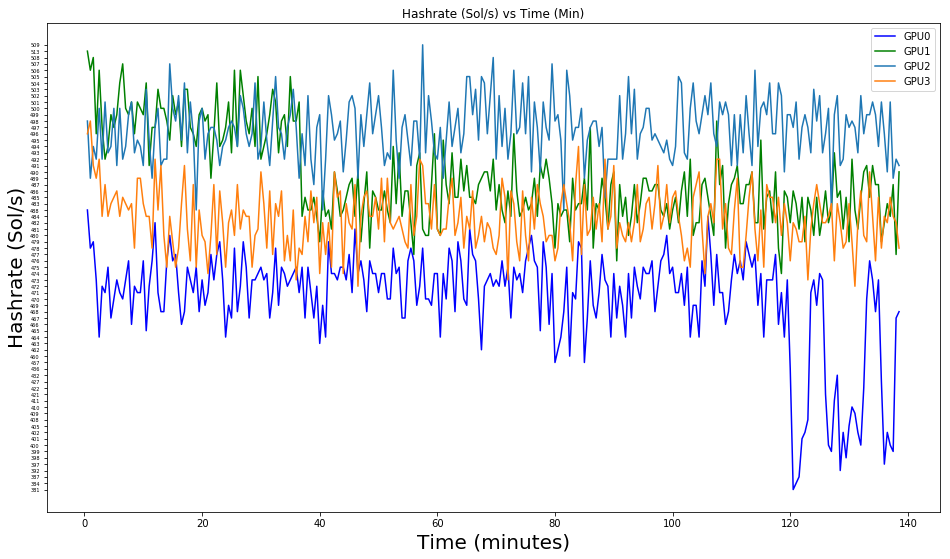

In [60]:
# Repeat for each additional gpu, creating a dataframe for each
# Multiple datasets can be plotted on one graph


df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
df_gpu0_sols.columns = ['GPU Number', 'Sol/s']
df_gpu0_sols = pd.concat([df_minutes, df_gpu0_sols], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()

df_gpu1_sols = df.loc[df['GPU Number'] == 'GPU1:']
df_gpu1_sols.reset_index(inplace=True)
del df_gpu1_sols['index']
df_gpu1_sols.columns = ['GPU Number', 'Sol/s']
df_gpu1_sols = pd.concat([df_minutes, df_gpu1_sols], axis = 1)
df_gpu1_sols = df_gpu1_sols.dropna()

df_gpu2_sols = df.loc[df['GPU Number'] == 'GPU2:']
df_gpu2_sols.reset_index(inplace=True)
del df_gpu2_sols['index']
df_gpu2_sols.columns = ['GPU Number', 'Sol/s']
df_gpu2_sols = pd.concat([df_minutes, df_gpu2_sols], axis = 1)
df_gpu2_sols = df_gpu2_sols.dropna()

df_gpu3_sols = df.loc[df['GPU Number'] == 'GPU3:']
df_gpu3_sols.reset_index(inplace=True)
del df_gpu3_sols['index']
df_gpu3_sols.columns = ['GPU Number', 'Sol/s']
df_gpu3_sols = pd.concat([df_minutes, df_gpu3_sols], axis = 1)
df_gpu3_sols = df_gpu3_sols.dropna()


plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0', color = 'b')
plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1', color = 'g')
plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')


plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.figure(figsize=(200,100))
plt.legend()
plt.show()

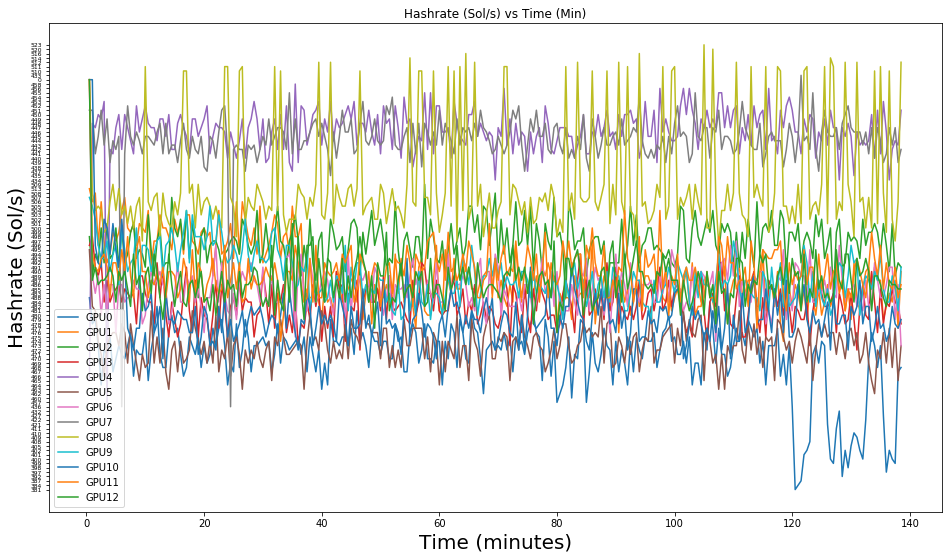

In [61]:
# The above graph indicated that GPU0 experienced some disruptions starting around 120 minutes
# Create dataframes and plot data for other devices

df_gpu4_sols = df.loc[df['GPU Number'] == 'GPU4:']
df_gpu4_sols.reset_index(inplace=True)
del df_gpu4_sols['index']
df_gpu4_sols.columns = ['GPU Number', 'Sol/s']
df_gpu4_sols = pd.concat([df_gpu4_sols, df_minutes], axis = 1)
df_gpu4_sols = df_gpu4_sols.dropna(axis = 0)


df_gpu5_sols = df.loc[df['GPU Number'] == 'GPU5:']
df_gpu5_sols.reset_index(inplace=True)
del df_gpu5_sols['index']
df_gpu5_sols.columns = ['GPU Number', 'Sol/s']
df_gpu5_sols = pd.concat([df_gpu5_sols, df_minutes], axis = 1)
df_gpu5_sols = df_gpu5_sols.dropna(axis = 0)


df_gpu6_sols = df.loc[df['GPU Number'] == 'GPU6:']
df_gpu6_sols.reset_index(inplace=True)
del df_gpu6_sols['index']
df_gpu6_sols.columns = ['GPU Number', 'Sol/s']
df_gpu6_sols = pd.concat([df_gpu6_sols, df_minutes], axis = 1)
df_gpu6_sols = df_gpu6_sols.dropna(axis = 0)


df_gpu7_sols = df.loc[df['GPU Number'] == 'GPU7:']
df_gpu7_sols.reset_index(inplace=True)
del df_gpu7_sols['index']
df_gpu7_sols.columns = ['GPU Number', 'Sol/s']
df_gpu7_sols = pd.concat([df_gpu7_sols, df_minutes], axis = 1)
df_gpu7_sols = df_gpu7_sols.dropna(axis = 0)


df_gpu8_sols = df.loc[df['GPU Number'] == 'GPU8:']
df_gpu8_sols.reset_index(inplace=True)
del df_gpu8_sols['index']
df_gpu8_sols.columns = ['GPU Number', 'Sol/s']
df_gpu8_sols = pd.concat([df_gpu8_sols, df_minutes], axis = 1)
df_gpu8_sols = df_gpu8_sols.dropna(axis = 0)


df_gpu9_sols = df.loc[df['GPU Number'] == 'GPU9:']
df_gpu9_sols.reset_index(inplace=True)
del df_gpu9_sols['index']
df_gpu9_sols.columns = ['GPU Number', 'Sol/s']
df_gpu9_sols = pd.concat([df_gpu9_sols, df_minutes], axis = 1)
df_gpu9_sols = df_gpu9_sols.dropna(axis = 0)


df_gpu10_sols = df.loc[df['GPU Number'] == 'GPU10:']
df_gpu10_sols.reset_index(inplace=True)
del df_gpu10_sols['index']
df_gpu10_sols.columns = ['GPU Number', 'Sol/s']
df_gpu10_sols = pd.concat([df_gpu10_sols, df_minutes], axis = 1)
df_gpu10_sols = df_gpu10_sols.dropna(axis = 0)


df_gpu11_sols = df.loc[df['GPU Number'] == 'GPU11:']
df_gpu11_sols.reset_index(inplace=True)
del df_gpu11_sols['index']
df_gpu11_sols.columns = ['GPU Number', 'Sol/s']
df_gpu11_sols = pd.concat([df_gpu11_sols, df_minutes], axis = 1)
df_gpu11_sols = df_gpu11_sols.dropna(axis = 0)


df_gpu12_sols = df.loc[df['GPU Number'] == 'GPU12:']
df_gpu12_sols.reset_index(inplace=True)
del df_gpu12_sols['index']
df_gpu12_sols.columns = ['GPU Number', 'Sol/s']
df_gpu12_sols = pd.concat([df_gpu12_sols, df_minutes], axis = 1)
df_gpu12_sols = df_gpu12_sols.dropna(axis = 0)

# df_all_sols = pd.concat([df_gpu0_sols, df_gpu1_sols['Sol/s'], df_gpu2_sols, df_gpu3_sols, df_gpu4_sols, df_gpu5_sols, df_gpu6_sols, df_gpu7_sols,
#                  df_gpu8_sols, df_gpu9_sols, df_gpu10_sols, df_gpu11_sols, df_gpu12_sols], axis = 1)
# df_all_sols.head()

plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0')
plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1')
plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
plt.plot(df_gpu4_sols['Minutes'], df_gpu4_sols['Sol/s'], label = 'GPU4')
plt.plot(df_gpu5_sols['Minutes'], df_gpu5_sols['Sol/s'], label = 'GPU5')
plt.plot(df_gpu6_sols['Minutes'], df_gpu6_sols['Sol/s'], label = 'GPU6')
plt.plot(df_gpu7_sols['Minutes'], df_gpu7_sols['Sol/s'], label = 'GPU7')
plt.plot(df_gpu8_sols['Minutes'], df_gpu8_sols['Sol/s'], label = 'GPU8')
plt.plot(df_gpu9_sols['Minutes'], df_gpu9_sols['Sol/s'], label = 'GPU9')
plt.plot(df_gpu10_sols['Minutes'], df_gpu10_sols['Sol/s'], label = 'GPU10')
plt.plot(df_gpu11_sols['Minutes'], df_gpu11_sols['Sol/s'], label = 'GPU11')
plt.plot(df_gpu12_sols['Minutes'], df_gpu12_sols['Sol/s'], label = 'GPU12')


plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=6)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

In [62]:
# The same result can be produced from creating a new dataframe made 
# from values taken from each devices previous dataframe

gpu0_sols = list()
gpu0_sols = df_gpu0_sols['Sol/s'].values
df0 = pd.DataFrame(gpu0_sols)
df0.columns = ['GPU0']

df_gpu0_sols['Sol/s'] = df_gpu0_sols['Sol/s'].astype(int)
gpu0_sols_mean = round(df_gpu0_sols['Sol/s'].mean(), 2)

gpu1_sols = df_gpu1_sols['Sol/s'].values
df1 = pd.DataFrame(gpu1_sols)
df1.columns = ['GPU1']

gpu2_sols = df_gpu2_sols['Sol/s'].values
df2 = pd.DataFrame(gpu2_sols)
df2.columns = ['GPU2']

gpu3_sols = df_gpu3_sols['Sol/s'].values
df3 = pd.DataFrame(gpu3_sols)
df3.columns = ['GPU3']

gpu4_sols = df_gpu4_sols['Sol/s'].values
df4 = pd.DataFrame(gpu4_sols)
df4.columns = ['GPU4']

gpu5_sols = df_gpu5_sols['Sol/s'].values
df5 = pd.DataFrame(gpu5_sols)
df5.columns = ['GPU5']

gpu6_sols = df_gpu6_sols['Sol/s'].values
df6 = pd.DataFrame(gpu6_sols)
df6.columns = ['GPU6']

gpu7_sols = df_gpu7_sols['Sol/s'].values
df7 = pd.DataFrame(gpu7_sols)
df7.columns = ['GPU7']

gpu8_sols = df_gpu8_sols['Sol/s'].values
df8 = pd.DataFrame(gpu8_sols)
df8.columns = ['GPU8']

gpu9_sols = df_gpu9_sols['Sol/s'].values
df9 = pd.DataFrame(gpu9_sols)
df9.columns = ['GPU9']

gpu10_sols = df_gpu10_sols['Sol/s'].values
df10 = pd.DataFrame(gpu10_sols)
df10.columns = ['GPU10']

gpu11_sols = df_gpu11_sols['Sol/s'].values
df11 = pd.DataFrame(gpu11_sols)
df11.columns = ['GPU11']

gpu12_sols = df_gpu12_sols['Sol/s'].values
df12 = pd.DataFrame(gpu12_sols)
df12.columns = ['GPU12']

df_all_sols = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1).astype(float)
df_all_sols.head()

,GPU0,GPU1,GPU2,GPU3,GPU4,GPU5,GPU6,GPU7,GPU8,GPU9,GPU10,GPU11,GPU12
0,488.0,513.0,498.0,496.0,465.0,495.0,0.0,451.0,0.0,507.0,0.0,0.0,0.0
1,478.0,506.0,489.0,498.0,448.0,482.0,489.0,451.0,508.0,505.0,0.0,494.0,487.0
2,479.0,508.0,494.0,491.0,447.0,481.0,483.0,441.0,504.0,502.0,496.0,491.0,491.0
3,473.0,496.0,492.0,489.0,450.0,474.0,489.0,445.0,505.0,496.0,492.0,490.0,486.0
4,464.0,506.0,500.0,492.0,449.0,471.0,480.0,451.0,504.0,493.0,491.0,493.0,487.0


In [63]:
# Create a list containing the sum of all values in each row
# Create df from list
# Concatenate new list to existing df

df_total_sols = df_all_sols.sum(axis = 1).astype(float)
df_total_sols = pd.DataFrame(df_total_sols)
df_total_sols.columns = ['Total Sol/s']
print (df_total_sols.head())

df_all_sols = pd.concat([df_minutes, df_all_sols, df_total_sols], axis = 1)
df_all_sols.head()

   Total Sol/s
0       3913.0
1       5835.0
2       6308.0
3       6277.0
4       6281.0


,Minutes,GPU0,GPU1,GPU2,GPU3,GPU4,GPU5,GPU6,GPU7,GPU8,GPU9,GPU10,GPU11,GPU12,Total Sol/s
0,0.5,488.0,513.0,498.0,496.0,465.0,495.0,0.0,451.0,0.0,507.0,0.0,0.0,0.0,3913.0
1,1.0,478.0,506.0,489.0,498.0,448.0,482.0,489.0,451.0,508.0,505.0,0.0,494.0,487.0,5835.0
2,1.5,479.0,508.0,494.0,491.0,447.0,481.0,483.0,441.0,504.0,502.0,496.0,491.0,491.0,6308.0
3,2.0,473.0,496.0,492.0,489.0,450.0,474.0,489.0,445.0,505.0,496.0,492.0,490.0,486.0,6277.0
4,2.5,464.0,506.0,500.0,492.0,449.0,471.0,480.0,451.0,504.0,493.0,491.0,493.0,487.0,6281.0


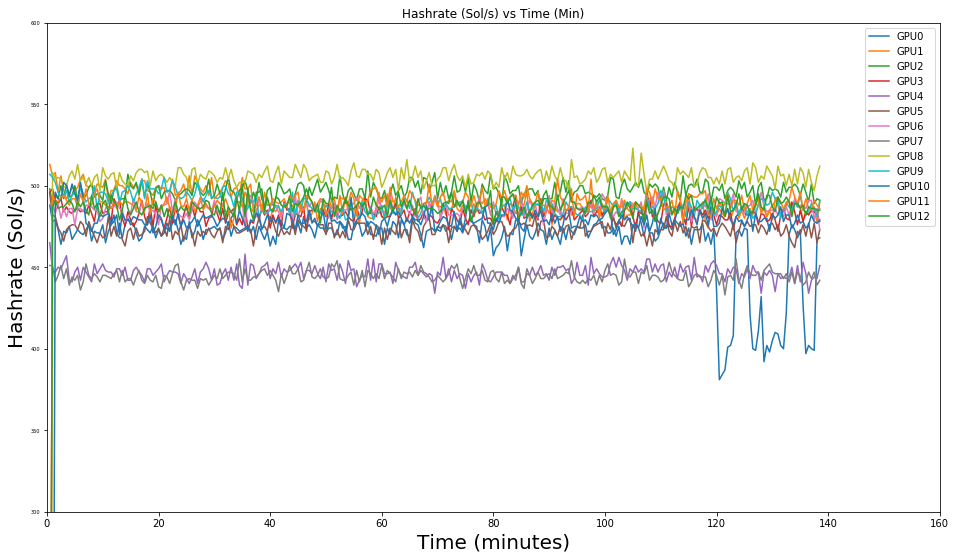

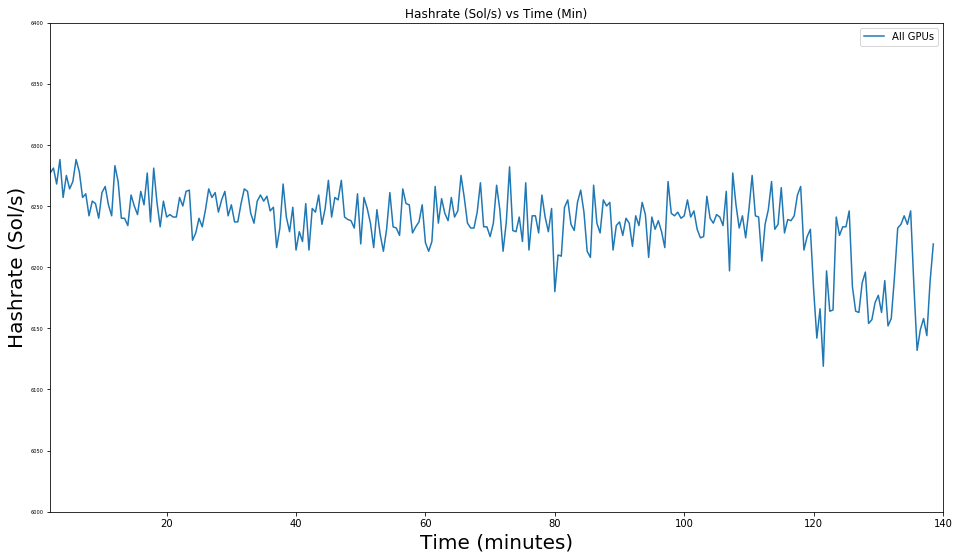

In [64]:
# Matplotlib is used to plot all Sol/s for each gpu versus minutes


plt.ylim(300, 600 )
plt.xlim(0, 160 )

plt.plot(df_all_sols['Minutes'], df_all_sols['GPU0'], label = 'GPU0')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU1'], label = 'GPU1')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU2'], label = 'GPU2')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU3'], label = 'GPU3')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU4'], label = 'GPU4')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU5'], label = 'GPU5')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU6'], label = 'GPU6')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU7'], label = 'GPU7')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU8'], label = 'GPU8')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU9'], label = 'GPU9')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU10'], label = 'GPU10')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU11'], label = 'GPU11')
plt.plot(df_all_sols['Minutes'], df_all_sols['GPU12'], label = 'GPU12')



plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()


# Matplotlib is used to plot all Sol/s for all GPU's versus minutes

plt.xlim(2, 140 )
plt.ylim(6000, 6400 )
plt.plot(df_all_sols['Minutes'], df_all_sols['Total Sol/s'], label = 'All GPUs')

plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

              Mean Sol/s
GPU0          465.971119
GPU1          489.158845
GPU2          496.841155
GPU3          482.472924
GPU4          446.703971
GPU5          473.216606
GPU6          484.277978
GPU7          444.530686
GPU8          504.007220
GPU9          488.895307
GPU10         476.212996
GPU11         488.245487
GPU12         485.851986
Total Sol/s  6226.386282


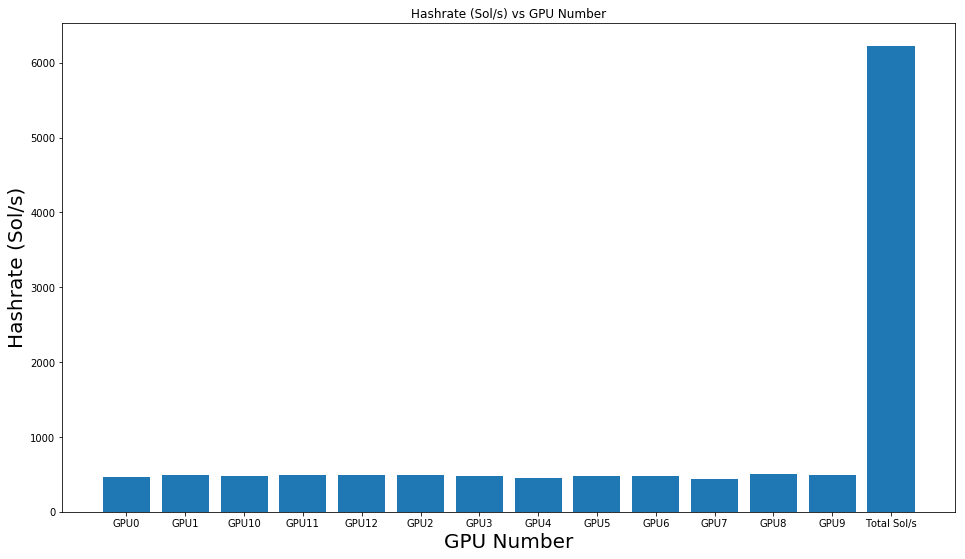

In [65]:
# Mean of each column

df_mean_sols = pd.DataFrame(df_all_sols.mean()).drop('Minutes')
df_mean_sols.columns = ['Mean Sol/s']
print(df_mean_sols)

plt.bar(df_mean_sols.index.values, df_mean_sols['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Hashrate (Sol/s) vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.xticks(df_mean_sols.index.values)
plt.show()


          Mean Sol/s
GPU0      465.971119
GPU1      489.158845
GPU2      496.841155
GPU3      482.472924
GPU4      446.703971
GPU5      473.216606
GPU6      484.277978
GPU7      444.530686
GPU8      504.007220
GPU9      488.895307
GPU10     476.212996
GPU11     488.245487
GPU12     485.851986
All GPUs  478.952791


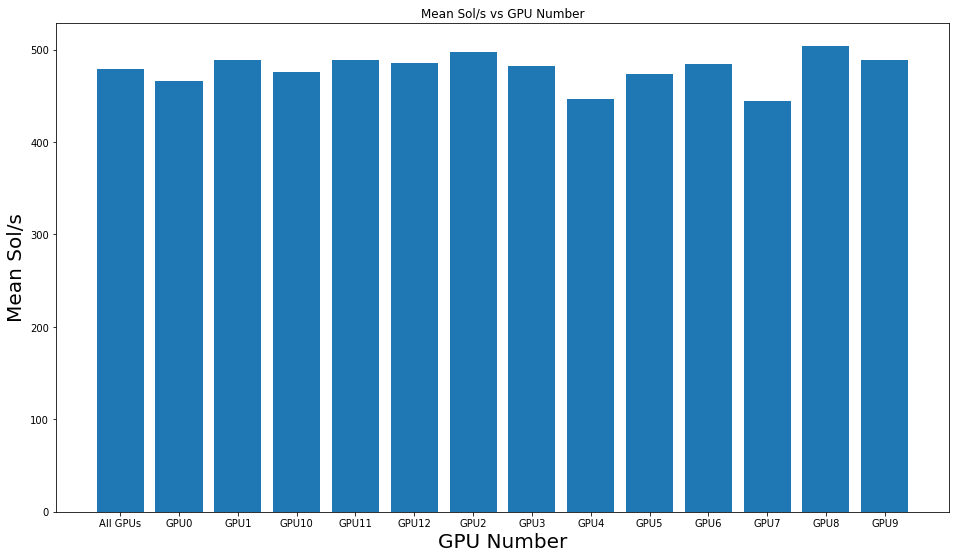

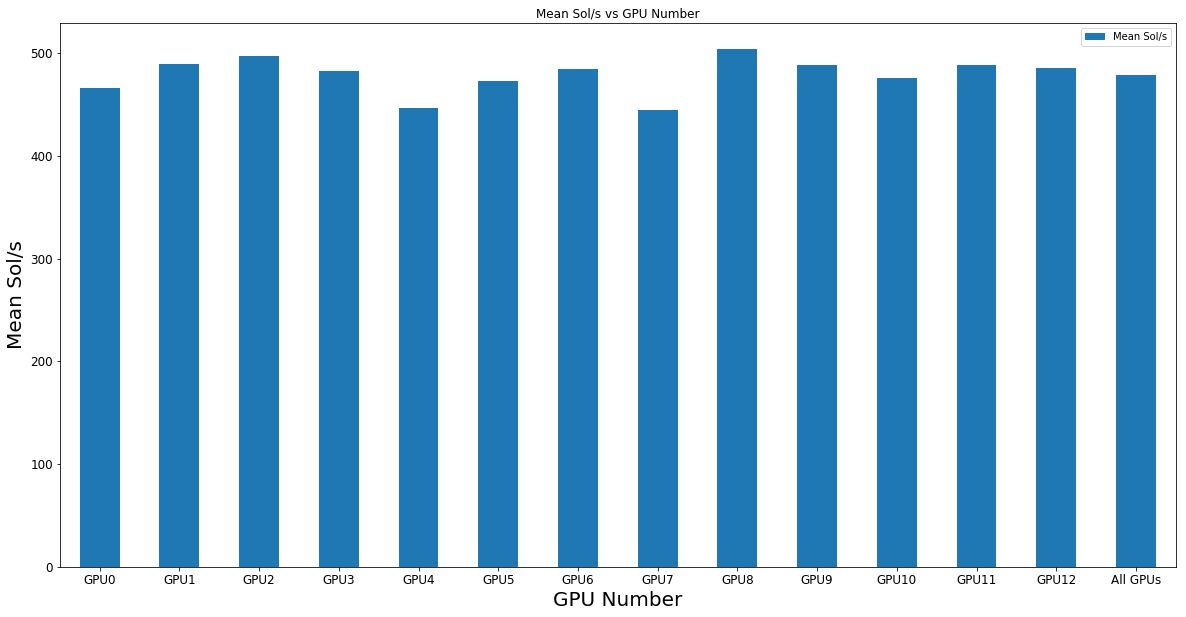

In [66]:
# The mean of all devices 

mean_all_sols = df_mean_sols.drop('Total Sol/s')
mean_all_sols = mean_all_sols.mean()
#meansols.astype(float)
#meansols = meansols.values
mean_all_sols = pd.DataFrame(mean_all_sols)
mean_all_sols.columns = ['Mean Sol/s']
mean_all_sols = mean_all_sols.rename({'Mean Sol/s': 'All GPUs'})
df_mean_sols = df_mean_sols.append(mean_all_sols).drop('Total Sol/s')
print(df_mean_sols)

plt.bar(df_mean_sols.index.values, df_mean_sols['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Mean Sol/s vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Sol/s', size = 20)
#plt.xticks(df_mean_sols.index.values)
plt.show()


df_mean_sols.plot(x = df_mean_sols.index.values, y = 'Mean Sol/s', figsize=(20,10), kind = 'bar', rot = 0)
#plt.bar(df_gpu0_temp['Minutes'], df_gpu0_temp['Temperature (C)'], align='center', alpha=1.0)
plt.title('Mean Sol/s vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Sol/s', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

The accepted shares are directly proportional to the reward recieved from each graphics cards computing power. Taking a look at this metric helps to identify performance differences based on the type of device, device settings, and potential hardware issues.

In [67]:
# Accepted Shares

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Prompt user for file input, catch with a defaut if statement
# Open file and isolate lines that start with INFO to make a list of lines returning the times 
# associated with each GPU and accepted share submitted.

fname = input('Enter file name: ')

if len(fname) < 1 : fname = "ewbf.log"
fh = open(fname)

d = dict()
d1 = dict()
d2 = dict()
lst = list()
lst2 = list()
lst3 = list()



for lines in fh:
    if not lines.startswith('INFO '): continue

# Having isolated the lines of interest, each string in the line is sliced to obtain the desired information


    x = lines.split(' ')    
    time = x[1]
    gpu_time = x[2]
    d[time] = gpu_time
    d1[time] = d1.get(time, 0) + 1
    
    shares = x[2]
    d2[shares] = d2.get(shares, 0) + 1

# Add keys and values from the dictionary to the empty list that has been created
for key in d:
    value = d[key]
    lst.append( (key, value) )
    
for key in d1:
    value = d1[key]
    lst2.append( (value) )
        
#print(lst)
#print(lst2)

# Making any sense out of the data presented in the list is difficult due to is size and structure
# Create a pandas dataframe to organize the data

df_gpu = pd.DataFrame(lst)
df_gpu.columns = ['Time', 'GPU']
print(df_gpu.head())
print(2*'\n')

df_shares = pd.DataFrame(lst2)
df_shares.columns = ['Accepted Shares']
print(df_shares.head())
print(2*'\n')

df_all_shares = pd.concat([df_gpu, df_shares], axis =1).dropna()
df_all_shares.head()

Enter file name: 
        Time   GPU
0  11:41:11:  GPU5
1  11:41:17:  GPU2
2  11:41:21:  GPU4
3  11:41:25:  GPU0
4  11:41:28:  GPU2



   Accepted Shares
0                1
1                1
2                1
3                1
4                1





,Time,GPU,Accepted Shares
0,11:41:11:,GPU5,1
1,11:41:17:,GPU2,1
2,11:41:21:,GPU4,1
3,11:41:25:,GPU0,1
4,11:41:28:,GPU2,1


Enter file:
{'11': 282, '12': 805, '13': 857, '14': 36}


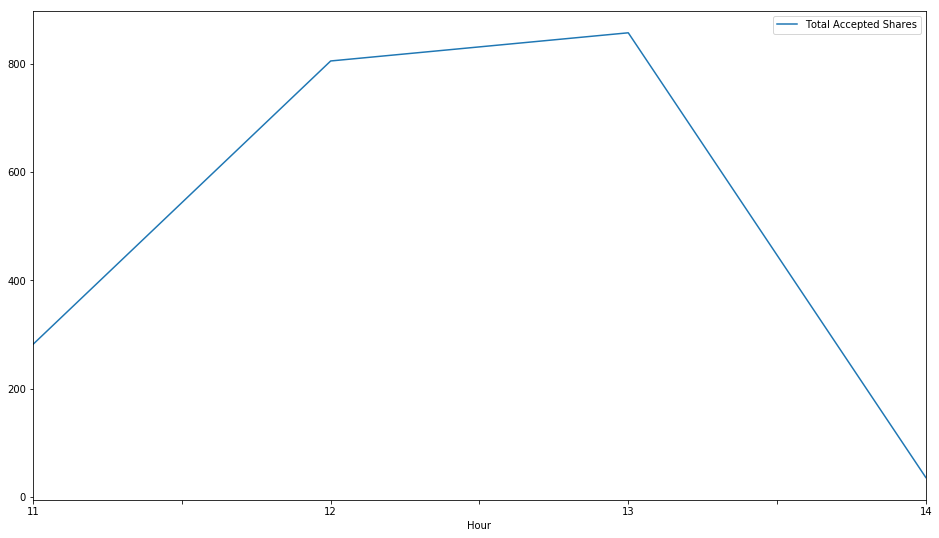

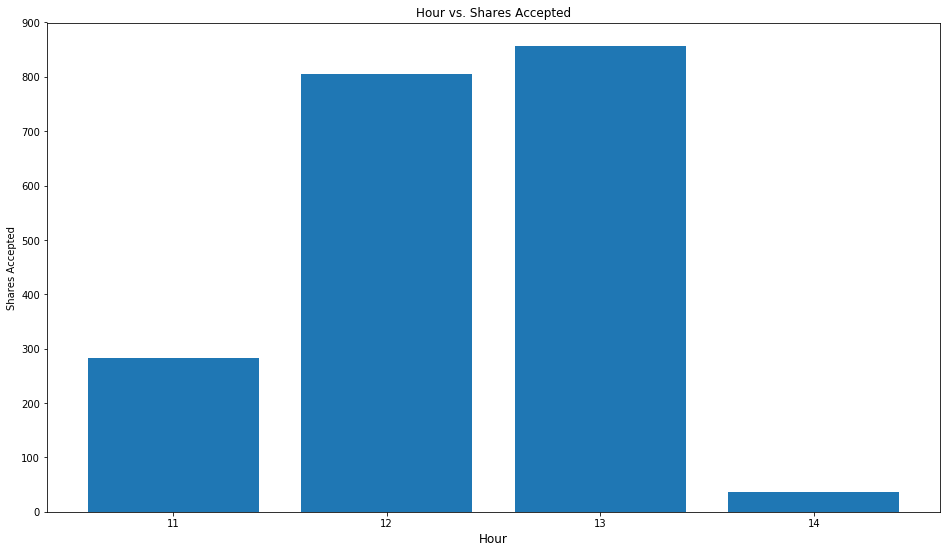

In [102]:
# A dictionary is used to count the number of shares per hour 

#File input

fname = input("Enter file:")
if len(fname) < 1 : fname = "ewbf.log"
fh = open(fname)

# Create dictionary
d3 = dict()


# For lines that start with 'INFO ' split the line to identify and isolate time(t)
# time(t) is then split into parts to isolate the hour(hr)
# Enter the hours values into the dictionary and count the number of times each has appeared 

for line in fh:
    if not line.startswith('INFO ') : continue
    pcs = line.split()
    t = pcs[1]
    pts = t.split(':')
    hr = pts[0]
    d3[hr] = d3.get(hr, 0) + 1
    
print(d3)

x = []
y = []

for key in d3:
    value = d3[key]
    x.append(key)
    y.append(value)

# create dataframe

df_ttl_share_hr = pd.DataFrame(x)
df_ttl_share = pd.DataFrame(y)
df_ttl_shares = pd.concat([df_ttl_share_hr, df_ttl_share], axis=1)
df_ttl_shares.columns = ['Hour', 'Total Accepted Shares']
df_ttl_shares


# Plot from pandas

# df_ttl_shares.plot(x='Hour', y='Total Accepted Shares', kind = 'bar')
# plt.show()

df_ttl_shares.plot(x='Hour', y='Total Accepted Shares', kind = 'line')
plt.show()

# df_ttl_shares.plot(x='Minutes', y='Total Accepted Shares', kind = 'bar')
# plt.show()

# df_ttl_shares.plot(x='Minutes', y='Total Accepted Shares', kind = 'line')
# plt.show()
# Plot using matplotlib    

plt.title('Hour vs. Shares Accepted')
plt.xlabel('Hour', size = 12)
plt.xticks(fontsize=10, rotation=0)
plt.ylabel('Shares Accepted')
plt.legend()
plt.bar(x, y, align='center', alpha=1.0)
plt.show()

# plt.title('Hour vs. Shares Accepted')
# plt.xlabel('Hour', size = 12)
# plt.xticks(fontsize=10, rotation=0)
# plt.ylabel('Shares Accepted')
# plt.legend()
# plt.plot(x,y)
# plt.show()

In [103]:
# Shares are submitted at random times with the HH:MM:SS time format
# datetime module would be helpful
# Each string within the time column is sliced and set as an integer
# Integer values are appended to df using pandas concat function

df_hr = df_all_shares.Time.str.slice(-9, -7).astype(int)
df_min = df_all_shares.Time.str.slice(-6, -4).astype(int)
df_sec = df_all_shares.Time.str.slice(-3, -1).astype(int)



result = pd.concat([df_all_shares, df_hr, df_min, df_sec], axis=1)
result.columns = ['Time', 'GPU', 'Accepted Shares', 'Hour', 'Minutes', 'Sec']
print(result.head())
print(2*'\n')


df_h = (result['Hour'] * 60)
df_s = (result['Sec'] / 60)

result2 = pd.concat([df_all_shares, df_h, df_min, df_s], axis=1)
result2.columns = ['Time', 'GPU', 'Accepted Shares', 'Min(Hour)', 'Minutes', 'Min(Sec)']
print(result2.head())
print(2*'\n')


df_mins = result2['Min(Hour)'] + result2['Minutes'] + result2['Min(Sec)']
result3 = pd.concat([df_all_shares, df_mins], axis = 1)
result3.columns = ['Time', 'GPU Number', 'Accepted Shares','Minutes']
result3.head()



        Time   GPU  Accepted Shares  Hour  Minutes  Sec
0  11:41:11:  GPU5                1    11       41   11
1  11:41:17:  GPU2                1    11       41   17
2  11:41:21:  GPU4                1    11       41   21
3  11:41:25:  GPU0                1    11       41   25
4  11:41:28:  GPU2                1    11       41   28



        Time   GPU  Accepted Shares  Min(Hour)  Minutes  Min(Sec)
0  11:41:11:  GPU5                1        660       41  0.183333
1  11:41:17:  GPU2                1        660       41  0.283333
2  11:41:21:  GPU4                1        660       41  0.350000
3  11:41:25:  GPU0                1        660       41  0.416667
4  11:41:28:  GPU2                1        660       41  0.466667





,Time,GPU Number,Accepted Shares,Minutes
0,11:41:11:,GPU5,1,701.183333
1,11:41:17:,GPU2,1,701.283333
2,11:41:21:,GPU4,1,701.350000
3,11:41:25:,GPU0,1,701.416667
4,11:41:28:,GPU2,1,701.466667


In [104]:
t0 = result3.iloc[0,3]

df_mins = result3['Minutes'] - t0
df_mins = pd.DataFrame(df_mins)
df_mins.columns = ['Minutes']
print(df_mins.head())

result3 = pd.concat([df_mins, df_all_shares], axis = 1)
result3.head()

    Minutes
0  0.000000
1  0.100000
2  0.166667
3  0.233333
4  0.283333


,Minutes,Time,GPU,Accepted Shares
0,0.000000,11:41:11:,GPU5,1
1,0.100000,11:41:17:,GPU2,1
2,0.166667,11:41:21:,GPU4,1
3,0.233333,11:41:25:,GPU0,1
4,0.283333,11:41:28:,GPU2,1


In [105]:
# # Plotting from pandas
# # plt.xticks(fontsize=12, rotation=45)

# result.plot(x='Time', y='Accepted Shares', figsize = (20,10))
# result.plot(x='Hour', y='Accepted Shares', kind = 'bar', figsize = (20,10))
# result.hist(column='Accepted Shares', bins=5, figsize = (20,10))

# plt.legend()
# plt.show()

# # Plotting with matplotlib

# import matplotlib.pyplot as plt

# x = result['Hour']
# y = result['Accepted Shares']
# plt.bar(x,y)
# plt.show()


# plt.plot(x,y)
# plt.show()

Enter file:
{'GPU5': 166, 'GPU2': 163, 'GPU4': 151, 'GPU0': 127, 'GPU1': 160, 'GPU3': 141, 'GPU9': 163, 'GPU12': 160, 'GPU8': 164, 'GPU10': 166, 'GPU11': 153, 'GPU7': 129, 'GPU6': 137}


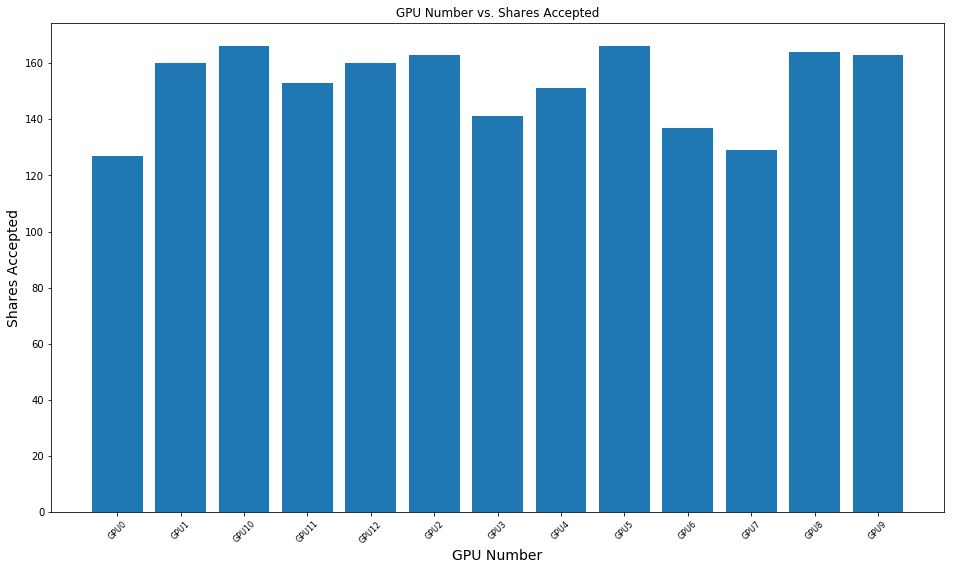

In [106]:
### Accepted Shares by GPU

# To get a better idea of why there may be such variance lets look at each GPU
# We can also make a dataframe directly from the dictionary that was created

fname = input("Enter file:")
if len(fname) < 1 : fname = "ewbf.log"
fh = open(fname)

d2 = dict()
for lines in fh:
    if not lines.startswith('INFO ') : continue


    x = lines.split(' ')    
    time = x[1]
    shares = x[2]
    d2[shares] = d2.get(shares, 0) + 1
    #d2[time] = d2.get(time, 0) + 1

print(d2)

x = []
y = []


lst = list()
for key in d2:
    value = d2[key]
    x.append(key)
    y.append(value)
    
plt.xlabel('GPU Number', size = 14)
plt.ylabel('Shares Accepted', size = 14)
plt.title('GPU Number vs. Shares Accepted')
plt.legend()

plt.bar(x,y, align='center', alpha=1.0)
plt.xticks(fontsize=8, rotation=45)
plt.show()


# Line Graph
#plt.plot(x,y)
#plt.xticks(fontsize=8, rotation=45)
#plt.show()


       All GPUs
GPU0      127.0
GPU1      160.0
GPU10     166.0
GPU11     153.0
GPU12     160.0
GPU2      163.0
GPU3      141.0
GPU4      151.0
GPU5      166.0
GPU6      137.0
GPU7      129.0
GPU8      164.0
GPU9      163.0



          Total Shares
GPU0             127.0
GPU1             160.0
GPU10            166.0
GPU11            153.0
GPU12            160.0
GPU2             163.0
GPU3             141.0
GPU4             151.0
GPU5             166.0
GPU6             137.0
GPU7             129.0
GPU8             164.0
GPU9             163.0
All GPUs        1980.0


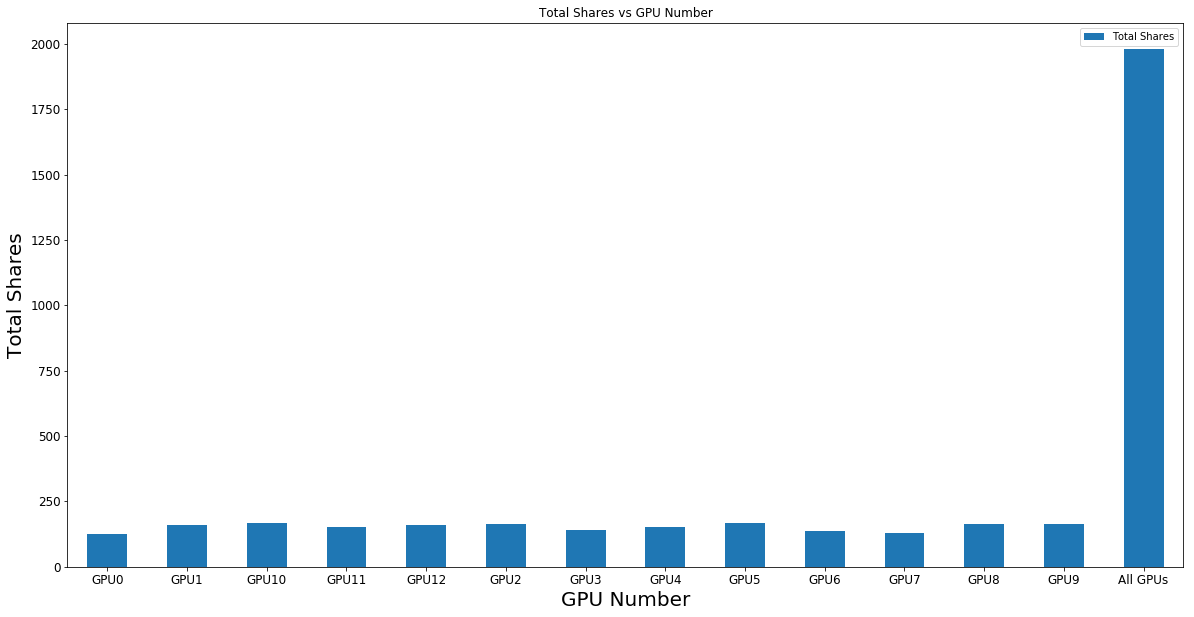

In [110]:
# Mean shares for all gpus
# From dictionary creates an unsorted dataframe 

df = pd.DataFrame.from_dict(d2, orient = 'index').sort_index().astype(float)
df.columns = ['Total Shares']
df
# plt.xlabel('GPU Number', size = 14)
# plt.ylabel('Shares Accepted', size = 14)
# plt.title('GPU Number vs. Shares Accepted')
# plt.legend()

# plt.bar(x,y, align='center', alpha=1.0)
# plt.xticks(fontsize=8, rotation=45)
# plt.show()

meanshares = df.mean(axis = 1)
meanshares = pd.DataFrame(meanshares)
meanshares.columns = ['All GPUs']
#meantemp = pd.Index.rename(name = 'All GPUs', inplace = True)
print(meanshares)
print(2*'\n')


sum_shares_all = meanshares.sum()
# meanshares.astype(float)
# meanshares = meanshares.values
sum_shares_all = pd.DataFrame(sum_shares_all)
sum_shares_all.columns = ['Total Shares']
# #meantemp = pd.Index.rename(name = 'All GPUs', inplace = True)
#meanshares

# meanshares = meanshares.rename({0: 'All GPUs'})
# meanshares

df_mean_shares = df.append(sum_shares_all)
print(df_mean_shares)

df_mean_shares.plot(x = df_mean_shares.index.values, y = 'Total Shares', figsize=(20,10), kind = 'bar', rot = 0)
plt.title('Total Shares vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Total Shares', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

          Mean Shares / Min
GPU0               0.898691
GPU1               1.132209
GPU10              1.174667
GPU11              1.082675
GPU12              1.132209
GPU2               1.153438
GPU3               0.997759
GPU4               1.068522
GPU5               1.174667
GPU6               0.969454
GPU7               0.912843
GPU8               1.160514
GPU9               1.153438
All GPUs           1.077776


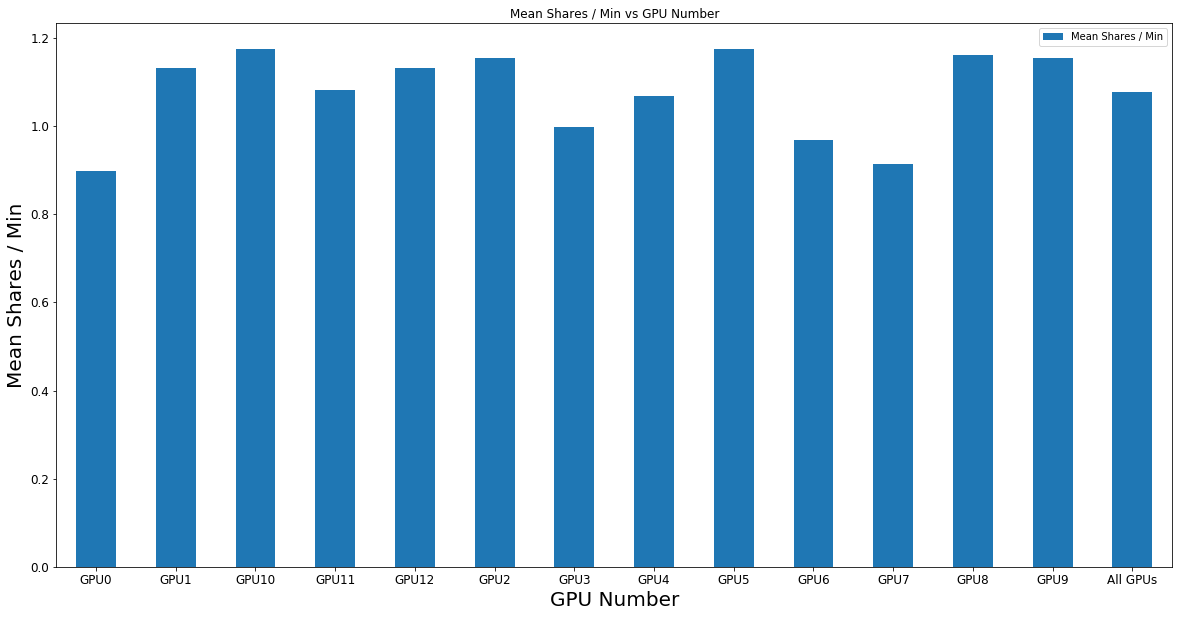

In [111]:
df_mean_shares = df_mean_shares.drop('All GPUs')
shares_min = df_mean_shares / df_mins['Minutes'].max().astype(float)
shares_min = pd.DataFrame(shares_min)
shares_min.columns = ['Mean Shares / Min']
shares_min

meanshares = shares_min.mean()
meanshares = pd.DataFrame(meanshares)
meanshares.columns = ['Mean Shares / Min']
meanshares = meanshares.rename({'Mean Shares / Min': 'All GPUs'})


df_mean_shares = shares_min.append(meanshares)
print(df_mean_shares)

df_mean_shares.plot(x = df_mean_shares.index.values, y = 'Mean Shares / Min', figsize=(20,10), kind = 'bar', rot = 0)
plt.title('Mean Shares / Min vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Shares / Min', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

As with all electronics, temperature plays a crucial role in their abililty to function as well as the duration of their lifespan. Graphics cards are built to run safely at higher than normal temperatures, however due to the continuous use while mining it is preferred that all cards stay below 75 C for stability and longevity.

In [112]:
# Temperatures

#File input

fname = input("Enter file:")
if len(fname) < 1 : fname = "ewbf.log"
fh = open(fname)


temp = dict()
lst = list()
for lines in fh:
    
    if not lines.startswith('Temp: '): continue
    x = lines.split(' ')
    #print(x)
    temp0 = x[2]
    temp[0] = temp0[:2]
    temp1 = x[4]
    temp[1] = temp1[:2]
    temp2 = x[6]
    temp[2] = temp2[:2]
    temp3 = x[8]
    temp[3] = temp3[:2]
    temp4 = x[10]
    temp[4] = temp4[:2]
    temp5 = x[12]
    temp[5] = temp5[:2]
    temp6 = x[14]
    temp[6] = temp6[:2]
    temp7 = x[16]
    temp[7] = temp7[:2]
    temp8 = x[18]
    temp[8] = temp8[:2]
    temp9 = x[20]
    temp[9] = temp9[:2]
    temp10 = x[22]
    temp[10] = temp10[:2]
    temp11 = x[24]
    temp[11] = temp11[:2]
    temp12 = x[26]
    temp[12] = temp12[:2]
    
    for key in temp:
        value = temp[key]
        lst.append( (key, value) )
#print(lst)
            
#df = pd.DataFrame.from_dict(temp, orient='index')
df = pd.DataFrame(lst)
df.columns = ['GPU Number', 'Temperature (C)']

df.tail()


Enter file:


,GPU Number,Temperature (C)
3596,8,56
3597,9,52
3598,10,53
3599,11,61
3600,12,56


   GPU Number Temperature (C)  Minutes
0         0.0              47      0.5
1         0.0              52      1.0
2         0.0              54      1.5
3         0.0              55      2.0
4         0.0              56      2.5


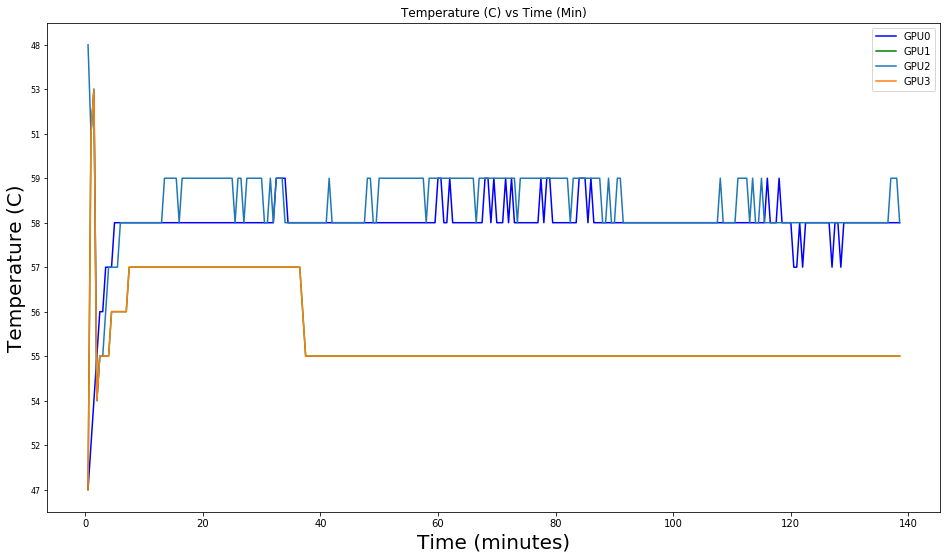

In [113]:
rows = df.index.values
lst = list()

for time in rows:
    secs = (30 + (time * 30))  
    minutes = secs / 60
    hrs = minutes / 60
    #print(minutes)
    lst.append(minutes)
#print(lst)
    
columns = ['Minutes']    
df_minutes = pd.DataFrame(lst, columns = columns)
df_minutes.head()

df_gpu0_temp = df.loc[df['GPU Number'] == 0]
df_gpu0_temp.reset_index(inplace=True)
del df_gpu0_temp['index']
df_gpu0_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu0_temp = pd.concat([df_gpu0_temp, df_minutes], axis = 1)
df_gpu0_temp = df_gpu0_temp.dropna()
print(df_gpu0_temp.head())

df_gpu1_temp = df.loc[df['GPU Number'] == 1]
df_gpu1_temp.reset_index(inplace=True)
del df_gpu1_temp['index']
df_gpu1_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu1_temp = pd.concat([df_gpu1_temp, df_minutes], axis = 1)
df_gpu1_temp = df_gpu1_temp.dropna()

df_gpu2_temp = df.loc[df['GPU Number'] == 2]
df_gpu2_temp.reset_index(inplace=True)
del df_gpu2_temp['index']
df_gpu2_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu2_temp = pd.concat([df_gpu2_temp, df_minutes], axis = 1)
df_gpu2_temp = df_gpu2_temp.dropna()

df_gpu3_temp = df.loc[df['GPU Number'] == 3]
df_gpu3_temp.reset_index(inplace=True)
del df_gpu3_temp['index']
df_gpu3_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu3_temp = pd.concat([df_gpu3_temp, df_minutes], axis = 1)
df_gpu3_temp = df_gpu1_temp.dropna()

plt.plot(df_gpu0_temp['Minutes'], df_gpu0_temp['Temperature (C)'], label = 'GPU0', color = 'b')
plt.plot(df_gpu1_temp['Minutes'], df_gpu1_temp['Temperature (C)'], label = 'GPU1', color = 'g')
plt.plot(df_gpu2_temp['Minutes'], df_gpu2_temp['Temperature (C)'], label = 'GPU2')
plt.plot(df_gpu3_temp['Minutes'], df_gpu3_temp['Temperature (C)'], label = 'GPU3')

plt.title('Temperature (C) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Temperature (C)', size = 20)
plt.yticks(fontsize=8)
#plt.figure(figsize=(200,100))
plt.legend()
plt.show()

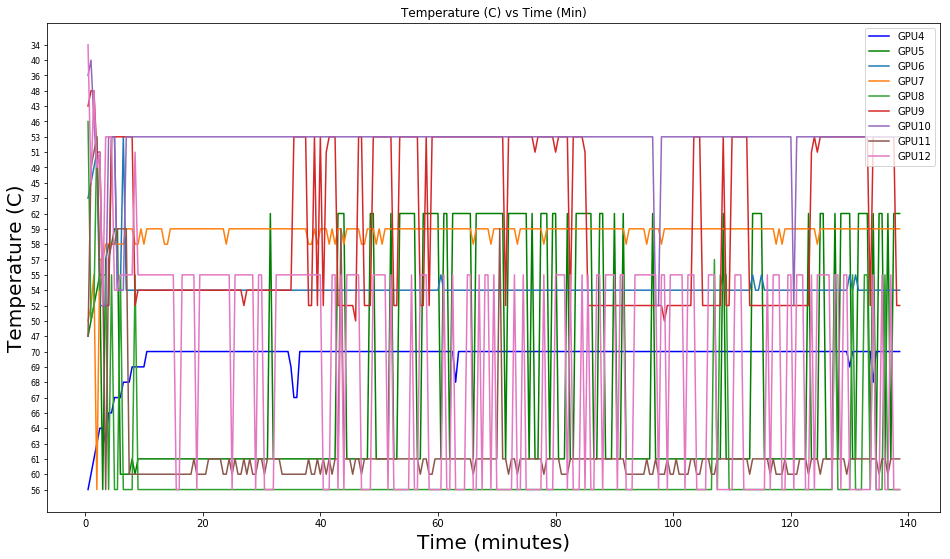

In [114]:
df_gpu4_temp = df.loc[df['GPU Number'] == 4]
df_gpu4_temp.reset_index(inplace=True)
del df_gpu4_temp['index']
df_gpu4_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu4_temp = pd.concat([df_gpu4_temp, df_minutes], axis = 1)
df_gpu4_temp = df_gpu4_temp.dropna()

df_gpu5_temp = df.loc[df['GPU Number'] == 5]
df_gpu5_temp.reset_index(inplace=True)
del df_gpu5_temp['index']
df_gpu5_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu5_temp = pd.concat([df_gpu5_temp, df_minutes], axis = 1)
df_gpu5_temp = df_gpu5_temp.dropna()

df_gpu6_temp = df.loc[df['GPU Number'] == 6]
df_gpu6_temp.reset_index(inplace=True)
del df_gpu6_temp['index']
df_gpu6_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu6_temp = pd.concat([df_gpu6_temp, df_minutes], axis = 1)
df_gpu6_temp = df_gpu6_temp.dropna()

df_gpu7_temp = df.loc[df['GPU Number'] == 7]
df_gpu7_temp.reset_index(inplace=True)
del df_gpu7_temp['index']
df_gpu7_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu7_temp = pd.concat([df_gpu7_temp, df_minutes], axis = 1)
df_gpu7_temp = df_gpu7_temp.dropna()

df_gpu8_temp = df.loc[df['GPU Number'] == 8]
df_gpu8_temp.reset_index(inplace=True)
del df_gpu8_temp['index']
df_gpu8_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu8_temp = pd.concat([df_gpu8_temp, df_minutes], axis = 1)
df_gpu8_temp = df_gpu8_temp.dropna()

df_gpu9_temp = df.loc[df['GPU Number'] == 9]
df_gpu9_temp.reset_index(inplace=True)
del df_gpu9_temp['index']
df_gpu9_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu9_temp = pd.concat([df_gpu9_temp, df_minutes], axis = 1)
df_gpu9_temp = df_gpu9_temp.dropna()

df_gpu10_temp = df.loc[df['GPU Number'] == 10]
df_gpu10_temp.reset_index(inplace=True)
del df_gpu10_temp['index']
df_gpu10_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu10_temp = pd.concat([df_gpu10_temp, df_minutes], axis = 1)
df_gpu10_temp = df_gpu10_temp.dropna()

df_gpu11_temp = df.loc[df['GPU Number'] == 11]
df_gpu11_temp.reset_index(inplace=True)
del df_gpu11_temp['index']
df_gpu11_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu11_temp = pd.concat([df_gpu11_temp, df_minutes], axis = 1)
df_gpu11_temp = df_gpu11_temp.dropna()

df_gpu12_temp = df.loc[df['GPU Number'] == 12]
df_gpu12_temp.reset_index(inplace=True)
del df_gpu12_temp['index']
df_gpu12_temp.columns = ['GPU Number', 'Temperature (C)']
df_gpu12_temp = pd.concat([df_gpu12_temp, df_minutes], axis = 1)
df_gpu12_temp = df_gpu12_temp.dropna()

plt.rcParams["figure.figsize"] = [16,9]

# plt.plot(df_gpu0_temp['Minutes'], df_gpu0_temp['Temperature (C)'], label = 'GPU0', color = 'b')
# plt.plot(df_gpu1_temp['Minutes'], df_gpu1_temp['Temperature (C)'], label = 'GPU1', color = 'g')
# plt.plot(df_gpu2_temp['Minutes'], df_gpu2_temp['Temperature (C)'], label = 'GPU2')
# plt.plot(df_gpu3_temp['Minutes'], df_gpu3_temp['Temperature (C)'], label = 'GPU3')

plt.plot(df_gpu4_temp['Minutes'], df_gpu4_temp['Temperature (C)'], label = 'GPU4', color = 'b')
plt.plot(df_gpu5_temp['Minutes'], df_gpu5_temp['Temperature (C)'], label = 'GPU5', color = 'g')
plt.plot(df_gpu6_temp['Minutes'], df_gpu6_temp['Temperature (C)'], label = 'GPU6')
plt.plot(df_gpu7_temp['Minutes'], df_gpu7_temp['Temperature (C)'], label = 'GPU7')

plt.plot(df_gpu8_temp['Minutes'], df_gpu8_temp['Temperature (C)'], label = 'GPU8')
plt.plot(df_gpu9_temp['Minutes'], df_gpu9_temp['Temperature (C)'], label = 'GPU9')
plt.plot(df_gpu10_temp['Minutes'], df_gpu10_temp['Temperature (C)'], label = 'GPU10')
plt.plot(df_gpu11_temp['Minutes'], df_gpu11_temp['Temperature (C)'], label = 'GPU11')
plt.plot(df_gpu12_temp['Minutes'], df_gpu12_temp['Temperature (C)'], label = 'GPU12')


plt.title('Temperature (C) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Temperature (C)', size = 20)
plt.yticks(fontsize=8)
#plt.figure(figsize=(200,100))
#plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

In [119]:
# Mean Temperature

gpu0_temp = df_gpu0_temp['Temperature (C)'].values
df0 = pd.DataFrame(gpu0_temp)
df0.columns = ['GPU0']

gpu1_temp = df_gpu1_temp['Temperature (C)'].values
df1 = pd.DataFrame(gpu1_temp)
df1.columns = ['GPU1']

gpu2_temp = df_gpu2_temp['Temperature (C)'].values
df2 = pd.DataFrame(gpu2_temp)
df2.columns = ['GPU2']

gpu3_temp = df_gpu3_temp['Temperature (C)'].values
df3 = pd.DataFrame(gpu3_temp)
df3.columns = ['GPU3']

gpu4_temp = df_gpu4_temp['Temperature (C)'].values
df4 = pd.DataFrame(gpu4_temp)
df4.columns = ['GPU4']

gpu5_temp = df_gpu5_temp['Temperature (C)'].values
df5 = pd.DataFrame(gpu5_temp)
df5.columns = ['GPU5']

gpu6_temp = df_gpu6_temp['Temperature (C)'].values
df6 = pd.DataFrame(gpu6_temp)
df6.columns = ['GPU6']

gpu7_temp = df_gpu7_temp['Temperature (C)'].values
df7 = pd.DataFrame(gpu7_temp)
df7.columns = ['GPU7']

gpu8_temp = df_gpu8_temp['Temperature (C)'].values
df8 = pd.DataFrame(gpu8_temp)
df8.columns = ['GPU8']

gpu9_temp = df_gpu9_temp['Temperature (C)'].values
df9 = pd.DataFrame(gpu9_temp)
df9.columns = ['GPU9']

gpu10_temp = df_gpu10_temp['Temperature (C)'].values
df10 = pd.DataFrame(gpu10_temp)
df10.columns = ['GPU10']

gpu11_temp = df_gpu11_temp['Temperature (C)'].values
df11 = pd.DataFrame(gpu11_temp)
df11.columns = ['GPU11']

gpu12_temp = df_gpu12_temp['Temperature (C)'].values
df12 = pd.DataFrame(gpu12_temp)
df12.columns = ['GPU12']


df_mean_temp = pd.concat([df_minutes, df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1)
df_mean_temp = df_mean_temp.dropna().astype(float)
df_mean_temp.head()

# Same graphs can be produced from this dataframe

,Minutes,GPU0,GPU1,GPU2,GPU3,GPU4,GPU5,GPU6,GPU7,GPU8,GPU9,GPU10,GPU11,GPU12
0,0.5,47.0,47.0,48.0,47.0,56.0,47.0,37.0,50.0,46.0,43.0,36.0,47.0,34.0
1,1.0,52.0,51.0,51.0,51.0,60.0,50.0,45.0,52.0,50.0,48.0,40.0,49.0,45.0
2,1.5,54.0,53.0,53.0,53.0,61.0,52.0,49.0,55.0,52.0,48.0,46.0,51.0,48.0
3,2.0,55.0,54.0,54.0,54.0,63.0,54.0,51.0,56.0,53.0,51.0,49.0,53.0,49.0
4,2.5,56.0,55.0,55.0,55.0,64.0,55.0,52.0,57.0,54.0,51.0,51.0,55.0,51.0


In [120]:
print (df_mean_temp.mean())

mean_temp = pd.DataFrame(df_mean_temp.mean())
mean_temp.columns = ['Mean Temperature (C)']

mean_temp = mean_temp.drop(['Minutes'], axis = 0)
mean_temp



Minutes    69.500000
GPU0       57.945848
GPU1       55.397112
GPU2       58.306859
GPU3       55.397112
GPU4       69.642599
GPU5       61.057762
GPU6       53.855596
GPU7       58.783394
GPU8       55.859206
GPU9       52.700361
GPU10      52.837545
GPU11      60.350181
GPU12      55.191336
dtype: float64


,Mean Temperature (C)
GPU0,57.945848
GPU1,55.397112
GPU2,58.306859
GPU3,55.397112
GPU4,69.642599
GPU5,61.057762
GPU6,53.855596
GPU7,58.783394
GPU8,55.859206
GPU9,52.700361


          Mean Temperature (C)
All GPUs             57.486532
          Mean Temperature (C)
GPU0                 57.945848
GPU1                 55.397112
GPU2                 58.306859
GPU3                 55.397112
GPU4                 69.642599
GPU5                 61.057762
GPU6                 53.855596
GPU7                 58.783394
GPU8                 55.859206
GPU9                 52.700361
GPU10                52.837545
GPU11                60.350181
GPU12                55.191336
All GPUs             57.486532


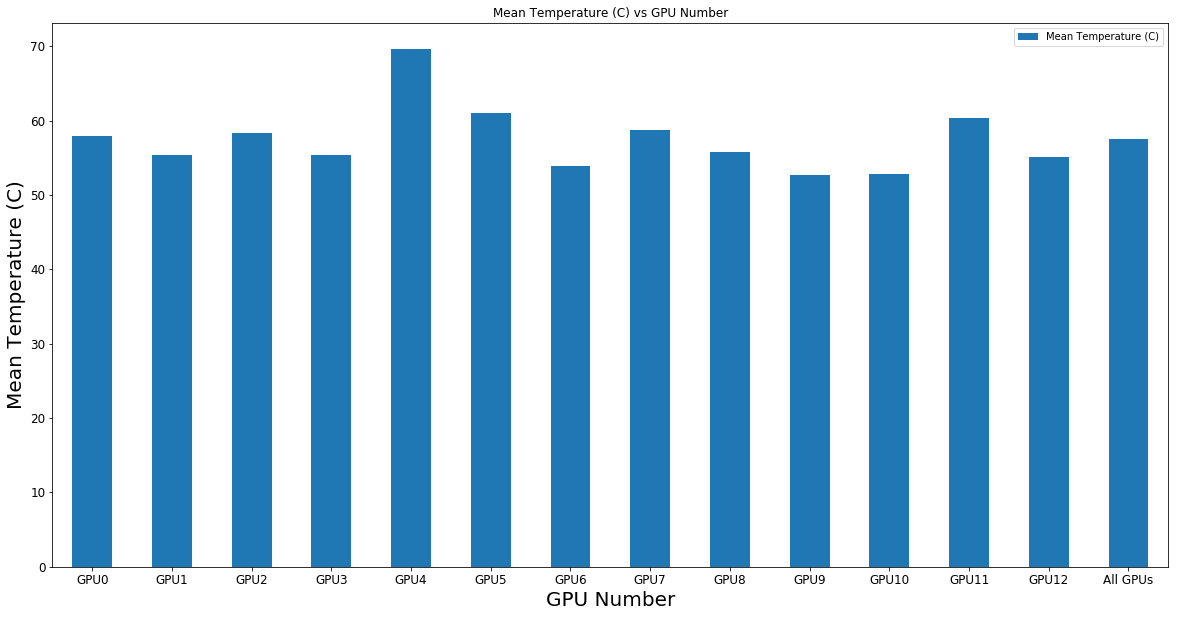

In [121]:
meantemp = mean_temp.astype(float).mean()
meantemp = meantemp.values
meantemp = pd.DataFrame(meantemp)
meantemp.columns = ['Mean Temperature (C)']
meantemp = meantemp.rename({0: 'All GPUs'})
print(meantemp)

mean_temp_all = mean_temp.append(meantemp)
print(mean_temp_all)

mean_temp_all.plot(x = mean_temp_all.index.values, y = 'Mean Temperature (C)', figsize=(20,10), kind = 'bar', rot = 0)
#plt.bar(df_gpu0_temp['Minutes'], df_gpu0_temp['Temperature (C)'], align='center', alpha=1.0)
plt.title('Mean Temperature (C) vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Mean Temperature (C)', size = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

In [122]:
# New dataframe is created by concatenating previously created datafframes for mean Sol/s, Shares/Min, and Temp
df = pd.concat([df_mean_sols, df_mean_shares, mean_temp_all], axis = 1)
df = round(df, 2)
df

,Mean Sol/s,Mean Shares / Min,Mean Temperature (C)
All GPUs,478.95,1.08,57.49
GPU0,465.97,0.90,57.95
GPU1,489.16,1.13,55.40
GPU10,476.21,1.17,52.84
GPU11,488.25,1.08,60.35
GPU12,485.85,1.13,55.19
GPU2,496.84,1.15,58.31
GPU3,482.47,1.00,55.40
GPU4,446.70,1.07,69.64
GPU5,473.22,1.17,61.06


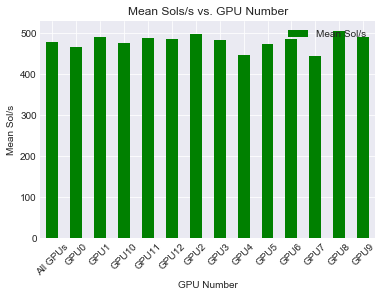

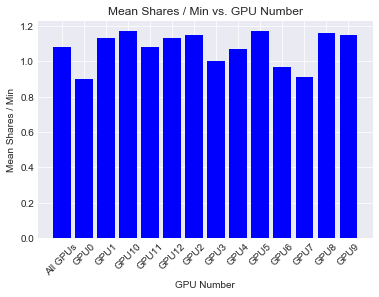

Text(0.5,1,'Mean Temperature (C) vs. GPU Number')

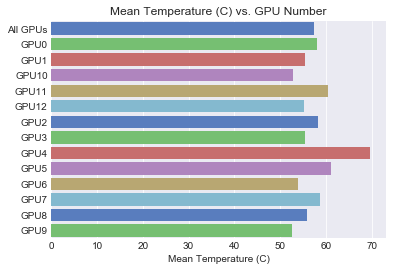

In [133]:
# Visualizations representing a quick view of the data for each device.

# from Pandas

df.plot(x= df.index.values, y = 'Mean Sol/s', kind = 'bar', color = 'green')
# df.plot(x= df.index.values, y = 'Mean Shares / Min', kind = 'bar')
# df.plot(x= df.index.values, y = 'Mean Temperature (C)', kind = 'bar')
plt.title('Mean Sols/s vs. GPU Number')
plt.xticks(rotation = 45)
plt.xlabel('GPU Number')
plt.ylabel('Mean Sol/s')
plt.show()

# from matplotlib

# plt.bar(df.index.values, df['Mean Sol/s'], label = '', color = 'r')
# plt.xticks(rotation = 45)
# plt.show()

plt.bar(df.index.values, df['Mean Shares / Min'], label = '', color = 'b')
plt.title('Mean Shares / Min vs. GPU Number')
plt.xticks(rotation = 45)
plt.xlabel('GPU Number')
plt.ylabel('Mean Shares / Min')
plt.show()

# plt.bar(df.index.values, df['Mean Temperature (C)'], label = '', color = 'g')
# plt.xticks(rotation = 45)
# plt.show()


# from seaborn

#sns.set_style("darkgrid")
# fps_bar = sns.barplot(y = df.index.values,
#                        x = df['Mean Sol/s'],
#                        palette='muted')
# plt.title('Mean Sols/s vs. GPU')


# sns.set_style("darkgrid")
# fps_bar = sns.barplot(y = df.index.values,
#                        x = df['Mean Shares / Min'],
#                        palette='muted')
# plt.title('Mean Shares / Min vs. GPU')


sns.set_style("darkgrid")
fps_bar = sns.barplot(y = df.index.values,
                       x = df['Mean Temperature (C)'],
                       palette='muted')
plt.title('Mean Temperature (C) vs. GPU Number')

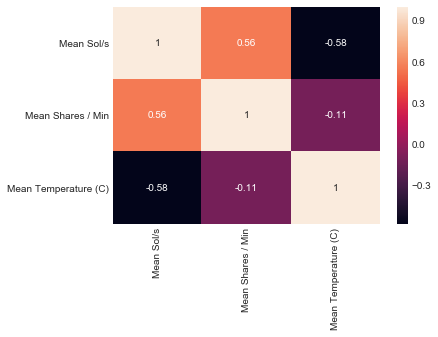

In [129]:
# Correlations?

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


corr = df.corr()
sns.heatmap(corr, annot = True)

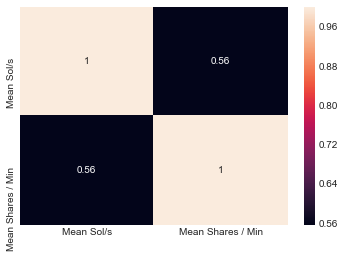

In [130]:
df_m = df.drop('Mean Temperature (C)', axis =1)
#df_m = df_m.drop('Mean Shares / Min', axis =1)

corr = df_m.corr()
sns.heatmap(corr, annot = True)

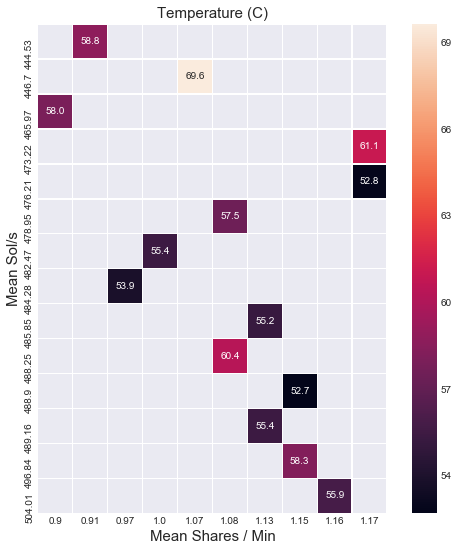

In [131]:
# Heatmaps?
# pass index as column in new df??

df.pivot('Mean Sol/s', 'Mean Shares / Min', 'Mean Temperature (C)').head()

plt.figure(figsize=(9,9))
pivot_table = df.pivot('Mean Sol/s', 'Mean Shares / Min', 'Mean Temperature (C)')
plt.xlabel(df.index, size=15)
plt.ylabel('Mean Shares / Min', size=15)
plt.title('Temperature (C)', size =15)
sns.heatmap(pivot_table, annot=True, fmt='.1f', linewidths=.5, square=True)

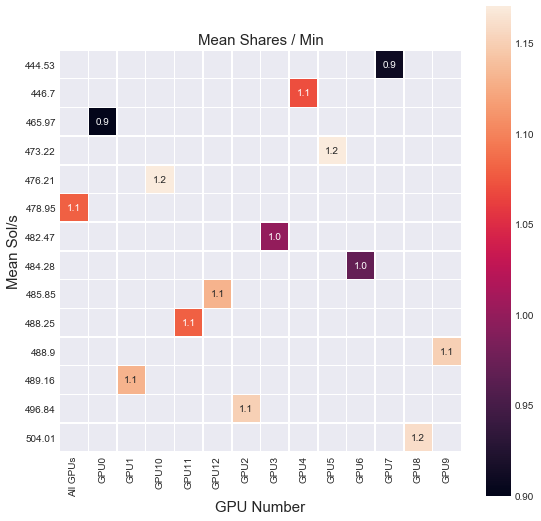

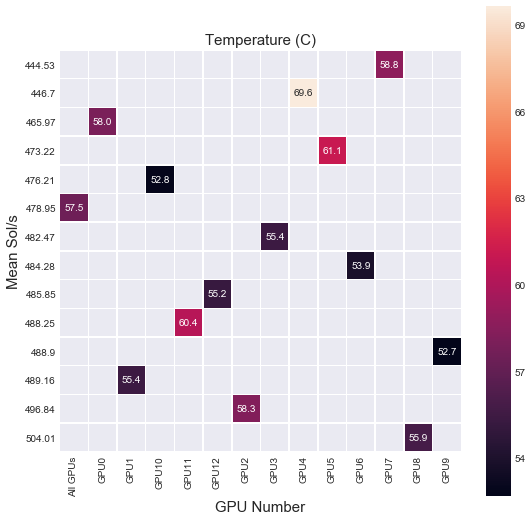

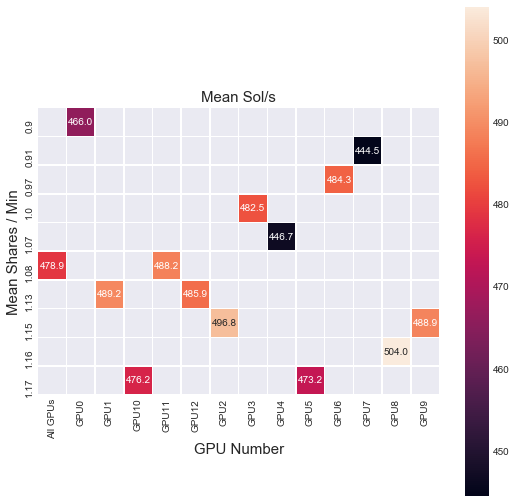

In [132]:
import numpy as np

df['GPU Number'] = df.index.values
df['GPU Number']

plt.figure(figsize=(9,9))
pivot_table = df.pivot('Mean Sol/s', 'GPU Number', 'Mean Shares / Min', )
plt.xlabel(df.index, size=15)
plt.ylabel('Mean Sol/s', size=15)
plt.title('Mean Shares / Min', size =15)
sns.heatmap(pivot_table, annot=True, fmt='.1f', linewidths=.5, square=True)

plt.figure(figsize=(9,9))
pivot_table = df.pivot('Mean Sol/s', 'GPU Number', 'Mean Temperature (C)' )
plt.xlabel(df.index, size=15)
plt.ylabel('Mean Shares / Min', size=15)
plt.title('Temperature (C)', size =15)
sns.heatmap(pivot_table, annot=True, fmt='.1f', linewidths=.5, square=True)

plt.figure(figsize=(9,9))
pivot_table = df.pivot('Mean Shares / Min', 'GPU Number', 'Mean Sol/s' )
plt.xlabel(df.index, size=15)
plt.ylabel('Mean Shares / Min', size=15)
plt.title('Mean Sol/s', size =15)
sns.heatmap(pivot_table, annot=True, fmt='.1f', linewidths=.5, square=True)

In [1416]:
# SQL